In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import numpy as np
from helper_functions.grape_functions import *
from main_grape.Grape import Grape
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:



#Defining time scales
total_time = 3.0
steps = 300

state_transfer = False
#Defining H0
qubit_state_num = 2
qubit_num = 2
freq_ge = 3.9#GHz
g = 0.2 #GHz

ens = np.array([ 2*np.pi*ii*(freq_ge) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)

X = multi_kron(Q_x,qubit_num)
Z = multi_kron(Q_z,qubit_num)
Y = multi_kron(Q_y,qubit_num)

H0 = kron_all(H_q,qubit_num, I_q)# + g*X


#Defining Concerned states (starting states)

psi0=[0]

all_ones_index = 0
for ii in range (qubit_num):
    all_ones_index = all_ones_index + qubit_state_num**ii
#Defining states to include in the drawing of occupation
states_draw_list = [0,all_ones_index]
states_draw_names = ['00..0','11..1']

#Defining U (Target)

target_vec = np.zeros(qubit_state_num**qubit_num,dtype=complex)
target_vec[0]=(1)/np.sqrt(2)

target_vec[all_ones_index]=1/np.sqrt(2)
    
U = [target_vec]

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num**qubit_num)
U0= q_identity

#Defining control Hs

Hops = []
Hnames = []
ops_max_amp = []
Hops,Hnames,ops_max_amp = append_separate_krons(Q_x,'x',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=8.0)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_z,'z',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=8.0)
Hops.extend([X,Z])
Hnames.extend(['all x','all z'])
ops_max_amp.extend([8.0,8.0])

print Hnames

#Defining convergence parameters
max_iterations = 1000
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':1, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}

reg_coeffs = {'dwdt':0.0001,'d2wdt2':0.0001*0.001}


['xi', 'ix', 'zi', 'iz', 'all x', 'all z']


L-BFGS-B optimization done


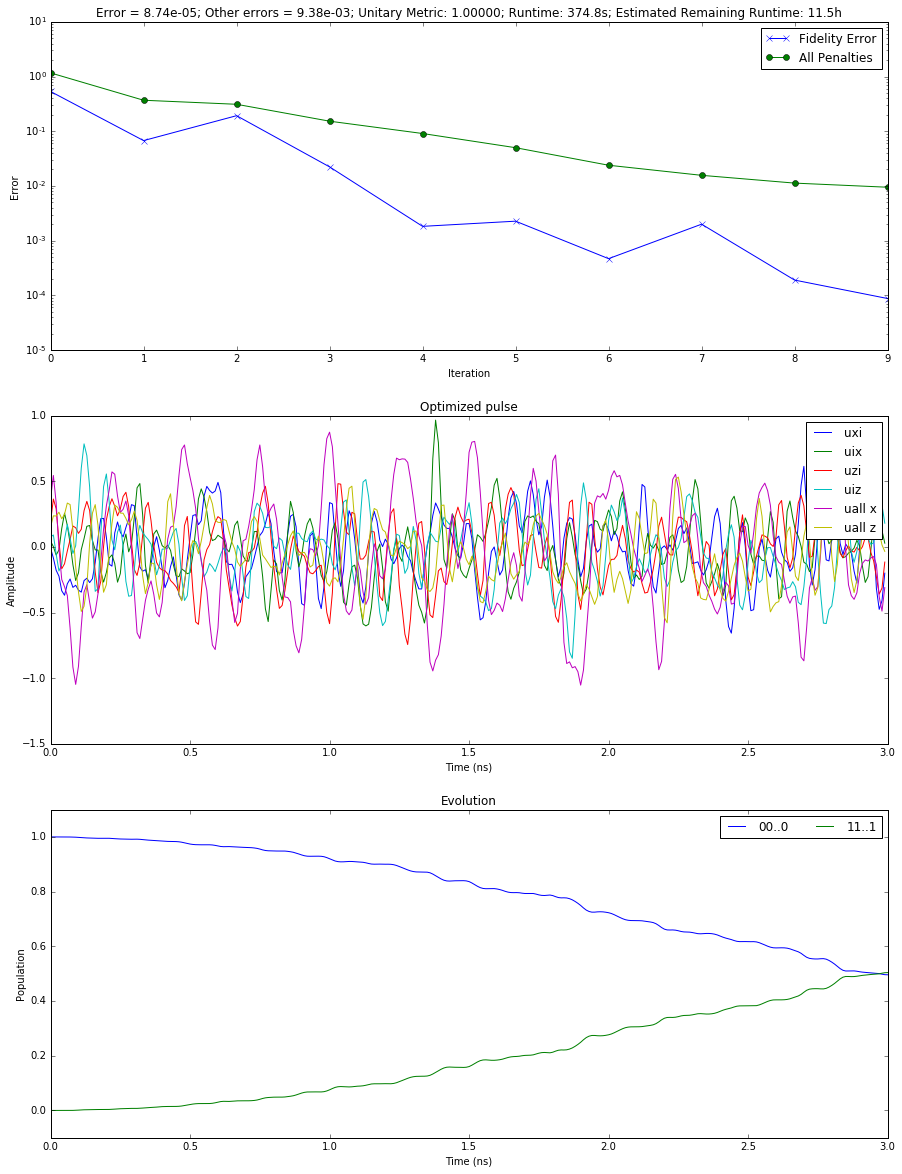

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],  state_transfer=True,
                    show_plots = True, 
       unitary_error = 1e-6, method = 'L-BFGS-B',switch = False,  maxA=ops_max_amp,\
                   reg_coeffs=reg_coeffs, file_name='spin_chain_ghz',
                    data_path = '/home/nelson/Simulations/GRAPE-Data/spin_chain_ghz')
      
      

In [ ]:
import numpy as np
import h5py

with h5py.File('/home/nelson/Simulations/GRAPE-Data/spin_chain_ghz/00017_spin_chain_ghz.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    steps = np.array(hf.get('steps'))
    print steps
    total_time = np.array(hf.get('total_time'))
    print total_time
    print np.array(hf.get('states_concerned_list'))
    print np.array(hf.get('iteration'))
    print np.array(hf.get('error'))
    print len(np.array(hf.get('iteration')))
    print len(np.array(hf.get('error')))
    print np.array(hf.get('inter_vecs_mag_squared')).shape
    print np.array(hf.get('uks')).shape
    
    inter_vec = np.array(hf.get('inter_vecs_mag_squared')[12][0][all_ones_index])
    
    plt.plot(inter_vec)
    
    print min(inter_vec)
    print max(inter_vec)
    
    print all_ones_index